In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv('quarterly_returns.csv')

In [3]:
df.dtypes

年份         int64
分组         int64
季度         int64
加权回报率    float64
月份        object
dtype: object

In [4]:

# 确保年份和季度的数据类型正确
df['年份'] = df['年份'].astype(str)
df['季度'] = df['季度'].astype(str)

# 创建一个新列'Year_Quarter'来合并年份和季度，并确保按照正确的时间顺序排序
df['Year_Quarter'] = df['年份'] + 'M' + df['季度']
df['Date'] = df['年份'] + '-' + df['季度'] + '-01' 

df['Date'] = pd.to_datetime(df['Date'])

# 计算每个分组的加权回报率累计和，并将累积回报率的初始值设为1
df['Cumulative_Return'] = df.groupby('分组')['加权回报率'].cumsum() + 1

# 对数据进行排序，确保图形的横轴按照年份和季度的顺序排列
df.sort_values(by=['Date'], inplace=True)



In [5]:
# 筛选出2014年第四季度及之后的数据
#df = df[df['Year_Quarter'] >= '2014Q4']
df = df[(df['Date'] >= '2013-12-01')]

In [6]:
df

,年份,分组,季度,加权回报率,月份,Year_Quarter,Date,Cumulative_Return
158,2013,2,12,0.129566,9-12,2013M12,2013-12-01,1.119751
155,2013,1,12,0.125663,9-12,2013M12,2013-12-01,1.201586
161,2013,3,12,0.191638,9-12,2013M12,2013-12-01,1.290570
152,2013,0,12,0.108167,9-12,2013M12,2013-12-01,1.098990
164,2013,4,12,0.193686,9-12,2013M12,2013-12-01,1.174158
...,...,...,...,...,...,...,...,...
305,2023,1,12,-0.052222,9-12,2023M12,2023-12-01,3.505503
308,2023,2,12,-0.071463,9-12,2023M12,2023-12-01,3.396439
311,2023,3,12,-0.044700,9-12,2023M12,2023-12-01,3.895056
302,2023,0,12,-0.026050,9-12,2023M12,2023-12-01,3.289921


In [7]:
df.loc[158, 'Cumulative_Return'] = 1
df.loc[155, 'Cumulative_Return'] = 1
df.loc[161, 'Cumulative_Return'] = 1
df.loc[152, 'Cumulative_Return'] = 1
df.loc[164, 'Cumulative_Return'] = 1

In [8]:
df

,年份,分组,季度,加权回报率,月份,Year_Quarter,Date,Cumulative_Return
158,2013,2,12,0.129566,9-12,2013M12,2013-12-01,1.000000
155,2013,1,12,0.125663,9-12,2013M12,2013-12-01,1.000000
161,2013,3,12,0.191638,9-12,2013M12,2013-12-01,1.000000
152,2013,0,12,0.108167,9-12,2013M12,2013-12-01,1.000000
164,2013,4,12,0.193686,9-12,2013M12,2013-12-01,1.000000
...,...,...,...,...,...,...,...,...
305,2023,1,12,-0.052222,9-12,2023M12,2023-12-01,3.505503
308,2023,2,12,-0.071463,9-12,2023M12,2023-12-01,3.396439
311,2023,3,12,-0.044700,9-12,2023M12,2023-12-01,3.895056
302,2023,0,12,-0.026050,9-12,2023M12,2023-12-01,3.289921


In [9]:
df.dtypes

年份                           object
分组                            int64
季度                           object
加权回报率                       float64
月份                           object
Year_Quarter                 object
Date                 datetime64[ns]
Cumulative_Return           float64
dtype: object

In [10]:
df.to_csv('./final-dataset.csv', index=False)

In [11]:
# 获取分组列表
groups = df['分组'].unique()


In [13]:
#group_data['Year_Quarter']

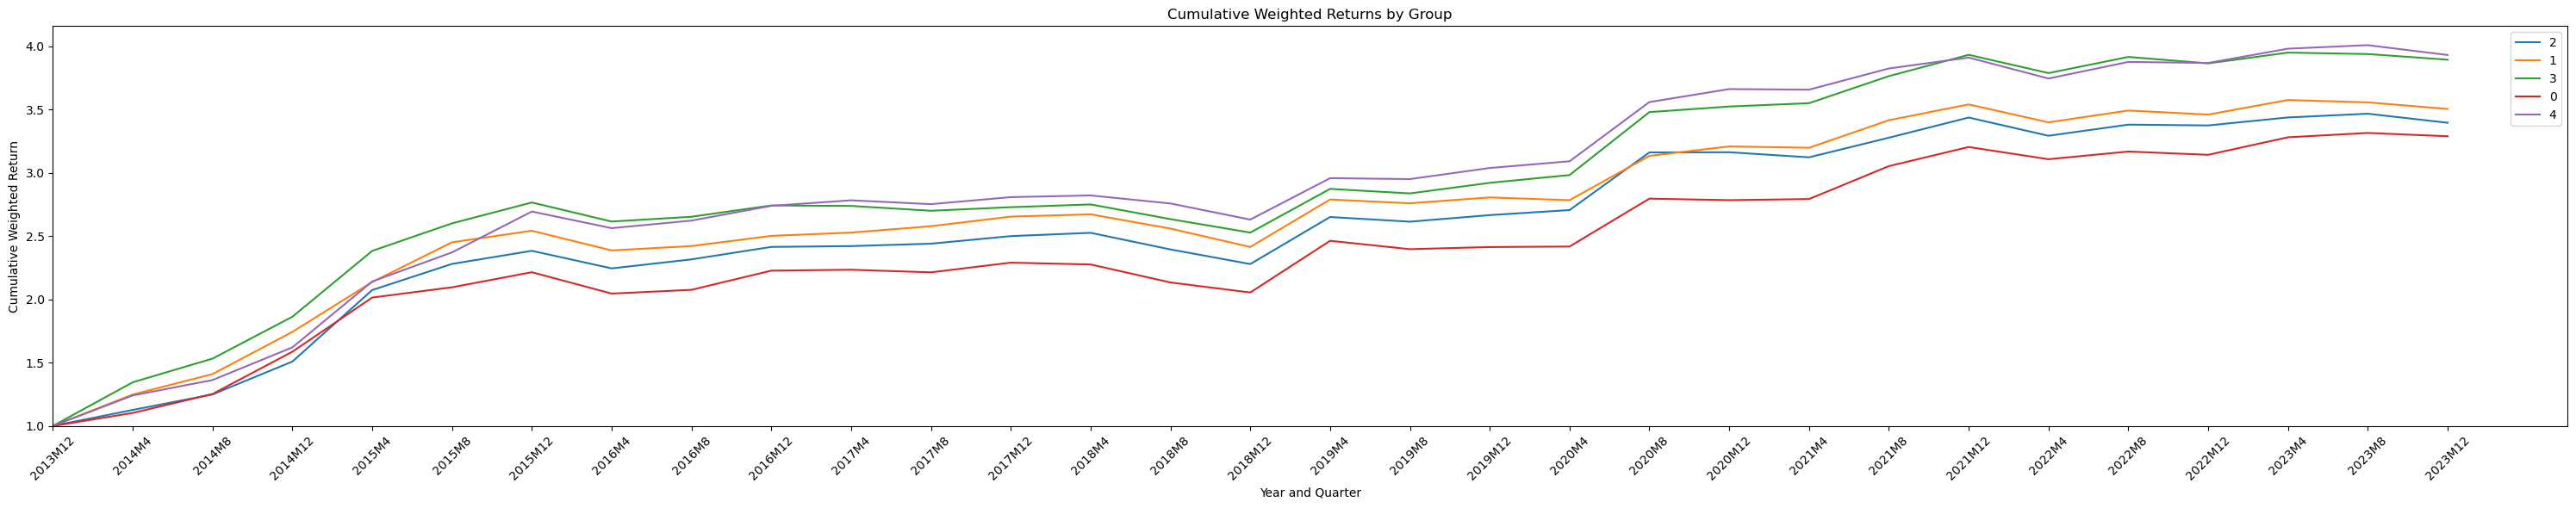

In [20]:

# 绘制每个分组的累计回报率折线图
plt.figure(figsize=(30, 6))

for group in groups:
    group_data = df[df['分组'] == group]
    plt.plot(group_data['Year_Quarter'], group_data['Cumulative_Return'], label=group)


# 设置y轴起始值为1
plt.ylim(bottom=1)

plt.xlim(left=0)

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Cumulative Weighted Returns by Group')
plt.xlabel('Year and Quarter')
plt.ylabel('Cumulative Weighted Return')

# 旋转x轴标签，以便它们更容易阅读
plt.xticks(rotation=45)

# 显示图形
plt.tight_layout()
plt.show()